# Can we predict who would've survived the Titanic?

### This notebook goes through a basic exploratory data analysis of the Kaggle Titanic dataset with Python

Although this notebook works towards creating a Kaggle submission, it should not be taken as exhaustive list of things to do with a dataset. It has been setup as an introduction to get you started with exploratory data analysis (EDA).

There are challenges and extensions listed throughout. I encourage you to take the foundations here and build upon them.

If you complete the challenges or get a better score than the one listed at the bottom of this notebook, [tweet me](www.twitter.com/mrdbourke) and I'llgive your work a shout out.

If you're interested, there's a video walkthrough of this notebook available on my YouTube: https://youtu.be/f1y9wDDxWnA

Keep learning,

Daniel

## Step 0: Why EDA?


Not all data comes in a neat little package ready to be modelled by the latest and greatest machine learning models.

Most of the time, you'll get a dataset you don't know much about. So before you can make any solid predictions, you'll to find out more.

This is where EDA comes in.

The main thing to remember is the first word. Exploratory. You're trying to figure out more about the data so you can build a model the best way you can.

You'll usually do this when you first look at a dataset but it'll continually happen as you learn more. EDA is an iterative process. There's no one way to do it either. It'll vary with each new dataset but there are some things you'll find yourself doing more often, we'll talk about those in this notebook and in a future blog post.


## Step 1: Download the data

You can download the data for this notebook here: https://www.kaggle.com/c/titanic/data

## Step 2: Work through the notebook
    
First we will import all the relevant dependencies we need.

If you don't have any of these, the notebook will throw an error. The error will likely tell you what you don't have. Then you'll have to install it.

You can usually figure out how to install it by Googling: "how to install [the thing you don't have]".

**PS** If you have any questions, feedback, advice or bug fixes, please let me know.

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a file called `data`.

In [2]:
# Import train & test data 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like

In [3]:
# View the training data
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


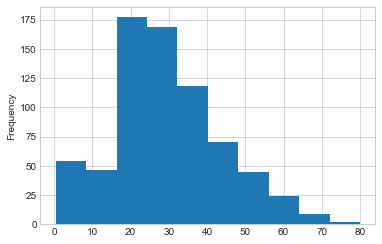

In [4]:
train.Age.plot.hist()

In [5]:
# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# View the example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

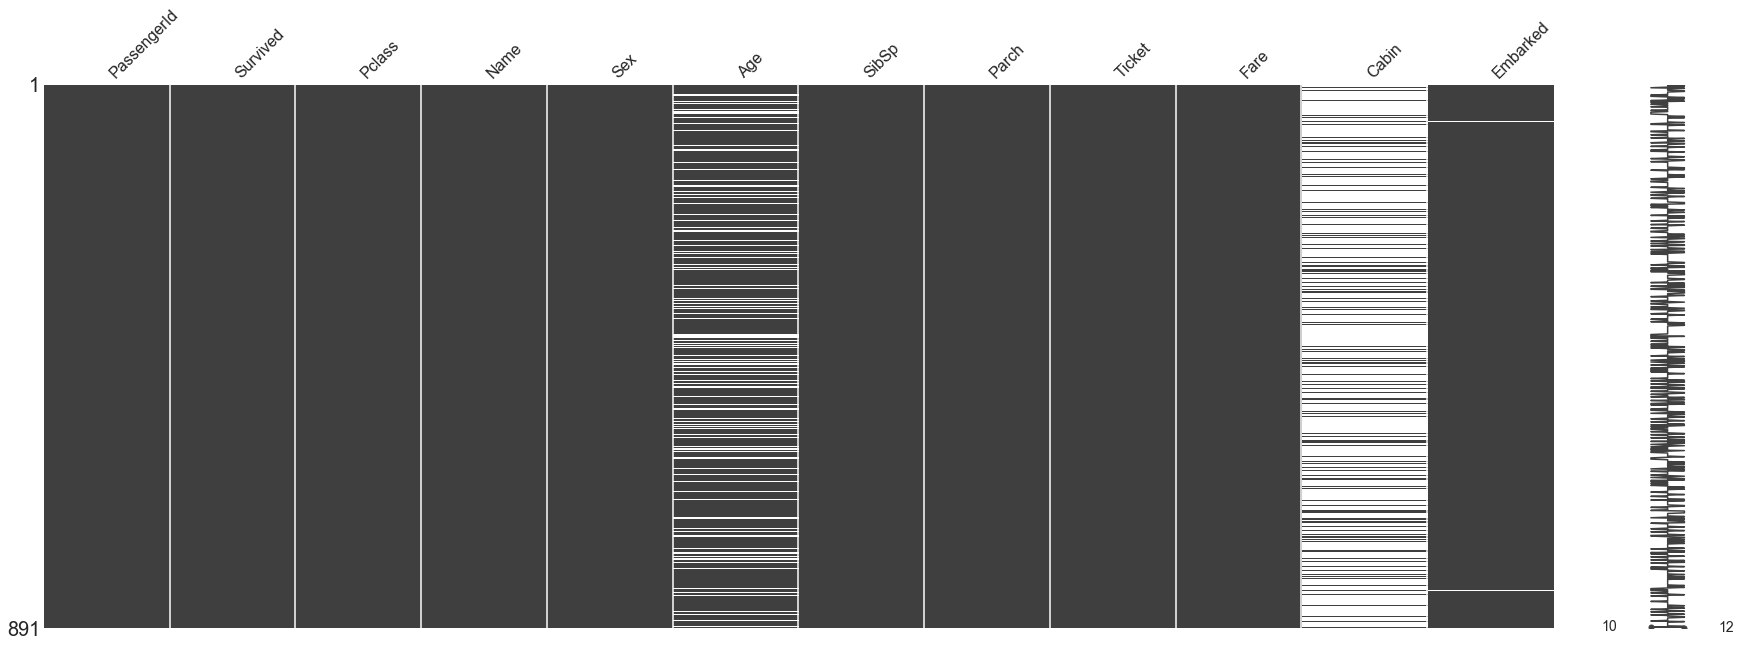

In [8]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

Ok we can clearly see some missing values here. Especially in the cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [9]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## To perform our data analysis, let's create two new dataframes

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [10]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind. 

In [11]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models.
Some may need more preprocessing than others to get ready.

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target Feature: Survived

Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


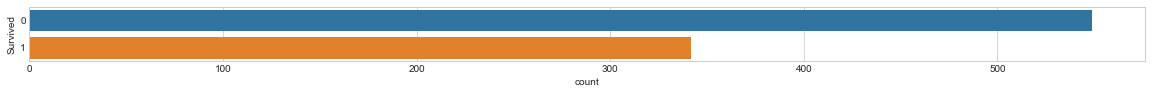

In [13]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [14]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [15]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [16]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

#### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

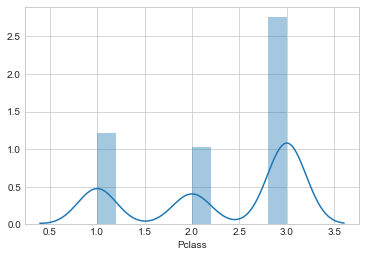

In [17]:
sns.distplot(train.Pclass)

We can see with this feature, the values are numerical (1, 2 and 3) but they are categories.

How do we know this? Because a passenger in Class 3 doesn't necessarily equal a passenger in Class 2 + a passenger in Class 1.

In [18]:
# How many missing variables does Pclass have?
train.Pclass.isnull().sum()

0

Since there are no missing values in Pclass, let's add it to our sub dataframes.

In [19]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature: Name
    
Description: The name of the passenger.

In [20]:
# How many different names are there?
train.Name.value_counts()

Lang, Mr. Fang                                   1
Gill, Mr. John William                           1
Madill, Miss. Georgette Alexandra                1
Romaine, Mr. Charles Hallace ("Mr C Rolmane")    1
Goodwin, Miss. Lillian Amy                       1
                                                ..
Duran y More, Miss. Asuncion                     1
Theobald, Mr. Thomas Leonard                     1
Attalah, Miss. Malake                            1
Torber, Mr. Ernst William                        1
Slocovski, Mr. Selman Francis                    1
Name: Name, Length: 891, dtype: int64

Every row has a unique name. This is equivalent to the passenger ID. But name could be used differently.

Can you think of ways you could reduce the number of different names? Or create new features out of the names?

**Note:** Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.

### Feature: Sex

Description: The sex of the passenger (male or female).

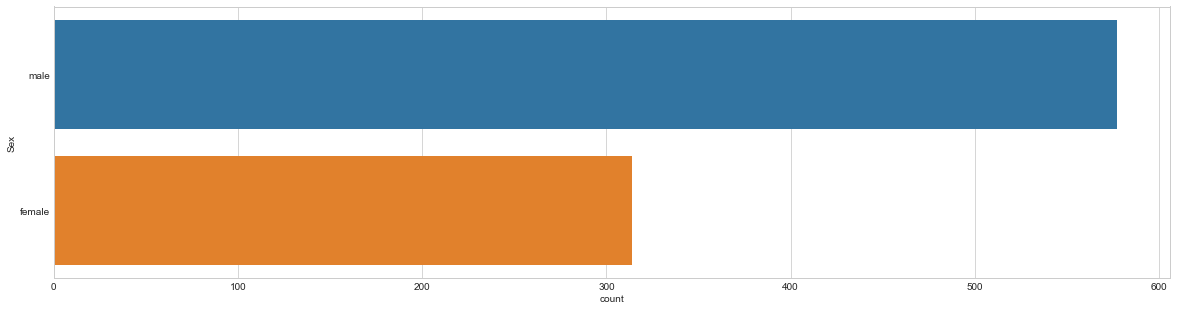

In [21]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [22]:
# Are there any missing values in the Sex column?
train.Sex.isnull().sum()

0

Since this is already binary variable (male or female), let's add it straight to our subset dataframes.

In [23]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [24]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

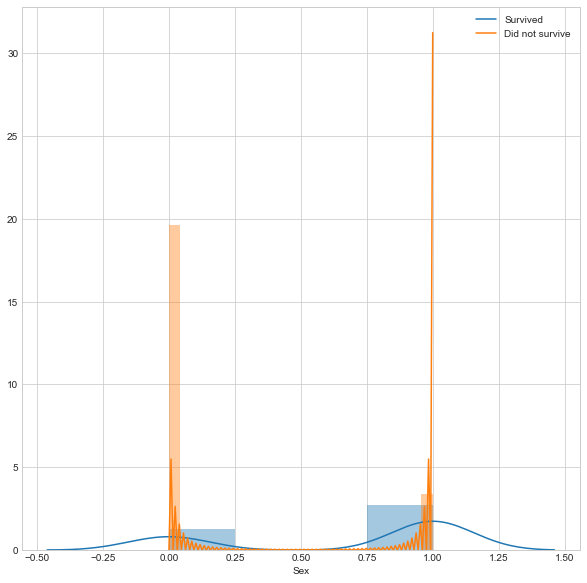

In [25]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

Not many people survived. But of those who did, more were female.

### Feature: Age

Description: The age of the passenger.

In [26]:
# How many missing values does age have?
train.Age.isnull().sum()

177

Out of a total 891 rows, that's almost one quarter of the dataset.

What would you do with these missing values?

Could replace them with the average age? What's the pro's and con's of doing this?

Or would you get rid of them completely?

We won't answer these questions in our initial EDA but this is something we would definitely revisit at a later date.


In [27]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
# df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
# df_con['Age'] = train['Age'] # non-bucketed

**Challenge:** How would you fill the missing variables in the `Age` column?

#### Function to create count and distribution visualisations

In [28]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [29]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [30]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Let's add SibSp to our subset dataframes and view the distributions.

In [31]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

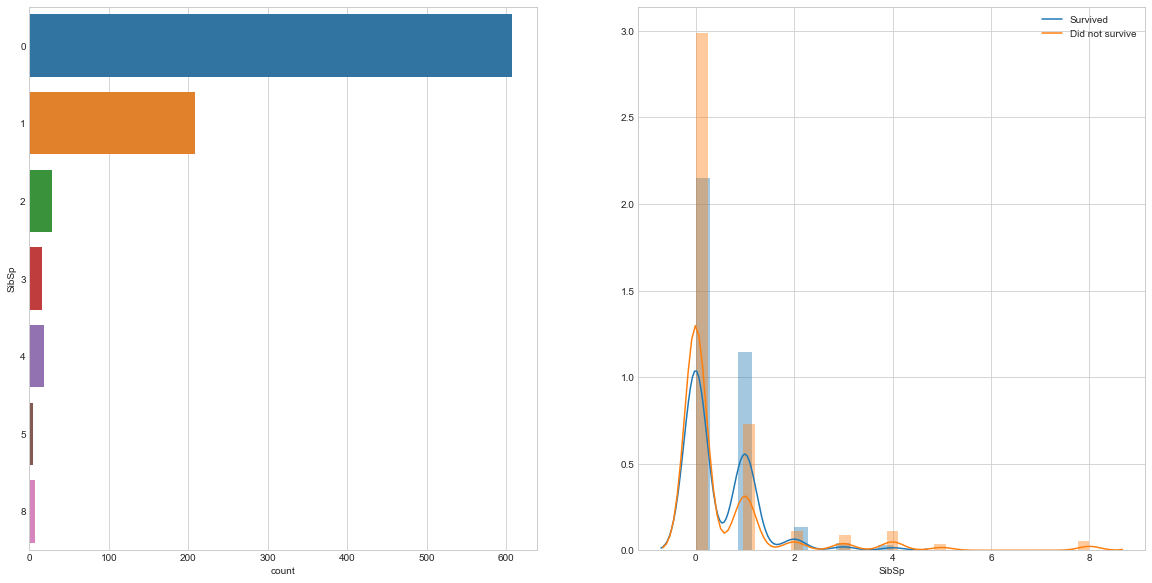

In [32]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

What does the graph on the right tell us?

### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

Since this feature is similar to SibSp, we'll do a similar analysis.

In [33]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [34]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

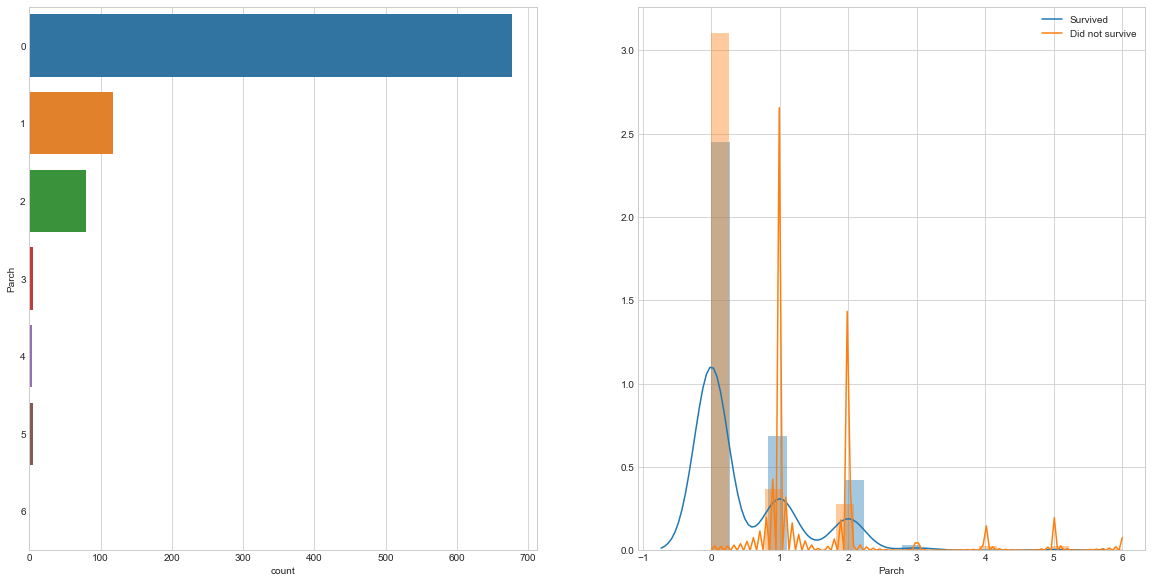

In [36]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

What does the graph on the right tell us about `Parch`?

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


### Feature: Ticket

Description: The ticket number of the boarding passenger.

In [39]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

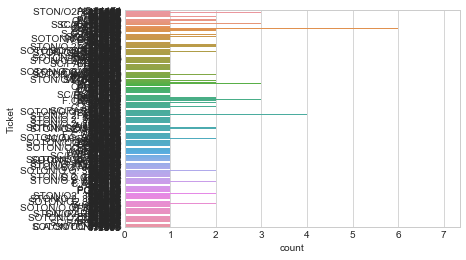

In [40]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

That doesn't look too good, what about another way of looking at it?

In [41]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

1601                 7
CA. 2343             7
347082               7
CA 2144              6
3101295              6
                    ..
STON/O 2. 3101274    1
350034               1
C.A. 33111           1
113050               1
27267                1
Name: Ticket, Length: 681, dtype: int64

In [42]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


681 unique values is too many for now. So we won't use `Ticket` in our subset dataframes.

There may be some way to reduce this down. 

**Challenge:** How could you reduce the Ticket feature? Is it even possible?

*Hint:* It may be similar to what you could do with Name.

### Feature: Fare

Description: How much the ticket cost.

In [43]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

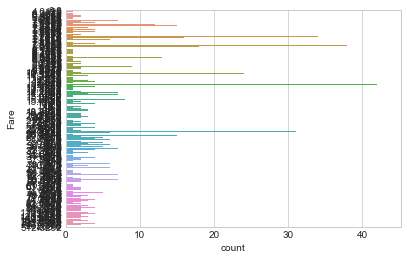

In [45]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [46]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [47]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [48]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [49]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

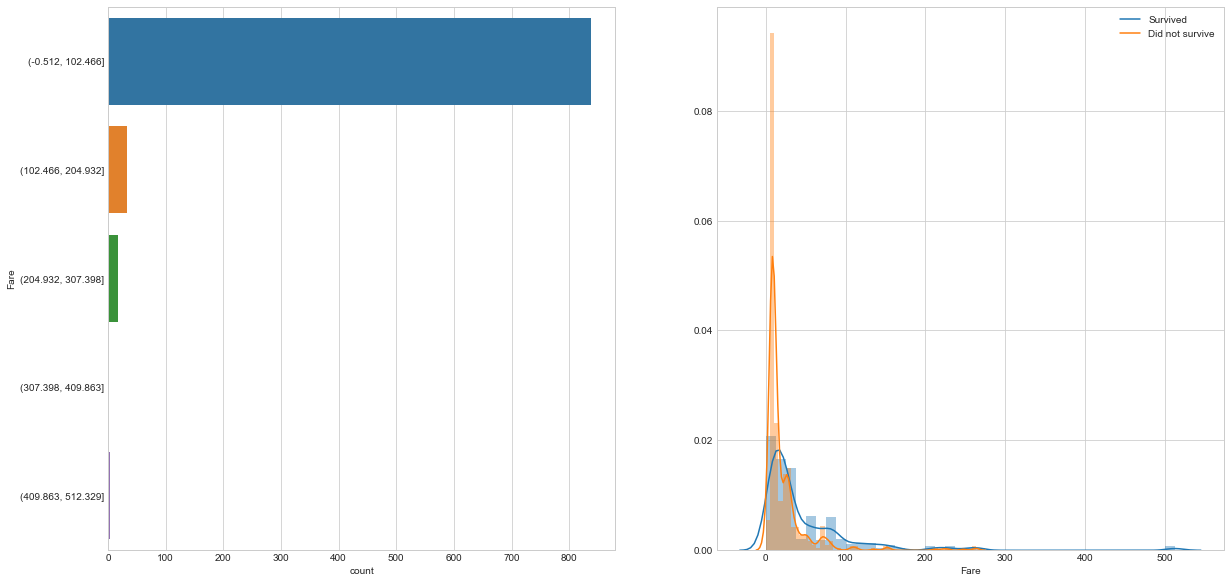

In [50]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

**Challenge:** How would you change the Fare bins?

### Feature: Cabin

Description: The cabin number where the passenger was staying.    

In [51]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# What do the Cabin values look like?
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
D              3
              ..
D37            1
A31            1
C50            1
C106           1
B30            1
Name: Cabin, Length: 147, dtype: int64

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

But how could you modify cabin to be more usable?

What could you do about the missing values?

### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [54]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [55]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

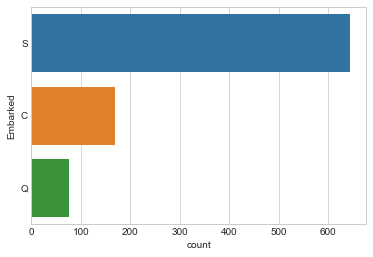

In [56]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

#### How can we deal with the 2 missing values of Embarked?

One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

What are the pros and cons of each?

For now, we will remove those rows.

In [57]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [58]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub dataframes.

## Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (`df_bin`) with one-hot encoding and our continuous dataframe (`df_con`) with the label encoding function from `sklearn`.

In [59]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [60]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [61]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


**Update:** The original version of this notebook used the `LabelEncoder()` function for encoding `df_con_enc`. However, as Tomáš pointed out, OneHotEncoder is better to use.
    
Check this article for more details: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

In [62]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [63]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [64]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Let's seperate the data

In [65]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [66]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [67]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [68]:
# Shape of the data (without labels)
X_train.shape

(889, 11)

In [69]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [70]:
# Shape of the labels
y_train.shape

(889,)

### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [72]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [73]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:50.545951


### K-Nearest Neighbours

In [74]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:01.384183


### Gaussian Naive Bayes

In [75]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.378892


### Linear Support Vector Machines (SVC)

In [76]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 76.6
Running Time: 0:00:00.462413


### Stochastic Gradient Descent

In [77]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 78.07
Accuracy CV 10-Fold: 66.48
Running Time: 0:00:00.102956


### Decision Tree Classifier

In [78]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.31
Running Time: 0:00:22.705272


### Gradient Boost Trees

In [79]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:23.757451


### CatBoost Algorithm
CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

For more on CatBoost and the methods it uses to deal with categorical variables, check out the [CatBoost docs](https://catboost.ai/).

In [80]:
# View the data for the CatBoost model
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [81]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [82]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

This means Catboost has picked up that all variables except `Fare` can be treated as categorical.

In [83]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [84]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [85]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 270ms	remaining: 4m 30s
1:	learn: 0.6809444	total: 277ms	remaining: 2m 18s
2:	learn: 0.6751692	total: 310ms	remaining: 1m 43s
3:	learn: 0.6689060	total: 339ms	remaining: 1m 24s
4:	learn: 0.6632144	total: 351ms	remaining: 1m 9s
5:	learn: 0.6576488	total: 366ms	remaining: 1m
6:	learn: 0.6544441	total: 368ms	remaining: 52.2s
7:	learn: 0.6490635	total: 419ms	remaining: 52s
8:	learn: 0.6443241	total: 439ms	remaining: 48.3s
9:	learn: 0.6395935	total: 461ms	remaining: 45.6s
10:	learn: 0.6345186	total: 477ms	remaining: 42.9s
11:	learn: 0.6305316	total: 484ms	remaining: 39.9s
12:	learn: 0.6275610	total: 486ms	remaining: 36.9s
13:	learn: 0.6225020	total: 499ms	remaining: 35.1s
14:	learn: 0.6179503	total: 508ms	remaining: 33.3s
15:	learn: 0.6140480	total: 511ms	remaining: 31.4s
16:	learn: 0.6100034	total: 520ms	remaining: 30.1s
17:	learn: 0.6049646	total: 541ms	remaining: 29.5s
18:	learn: 0.6025760	total: 544ms	remaining: 28.1s
19:	learn: 0

162:	learn: 0.4236345	total: 2.04s	remaining: 10.5s
163:	learn: 0.4234396	total: 2.05s	remaining: 10.4s
164:	learn: 0.4228926	total: 2.06s	remaining: 10.4s
165:	learn: 0.4227463	total: 2.09s	remaining: 10.5s
166:	learn: 0.4226186	total: 2.11s	remaining: 10.5s
167:	learn: 0.4222141	total: 2.13s	remaining: 10.6s
168:	learn: 0.4219366	total: 2.15s	remaining: 10.6s
169:	learn: 0.4216245	total: 2.16s	remaining: 10.5s
170:	learn: 0.4213900	total: 2.16s	remaining: 10.5s
171:	learn: 0.4210836	total: 2.18s	remaining: 10.5s
172:	learn: 0.4208199	total: 2.19s	remaining: 10.5s
173:	learn: 0.4206421	total: 2.2s	remaining: 10.5s
174:	learn: 0.4201114	total: 2.22s	remaining: 10.4s
175:	learn: 0.4198212	total: 2.22s	remaining: 10.4s
176:	learn: 0.4195834	total: 2.23s	remaining: 10.4s
177:	learn: 0.4195685	total: 2.24s	remaining: 10.3s
178:	learn: 0.4194809	total: 2.24s	remaining: 10.3s
179:	learn: 0.4191368	total: 2.26s	remaining: 10.3s
180:	learn: 0.4185960	total: 2.27s	remaining: 10.3s
181:	learn: 0

325:	learn: 0.3930115	total: 3.8s	remaining: 7.86s
326:	learn: 0.3929436	total: 3.8s	remaining: 7.83s
327:	learn: 0.3928210	total: 3.81s	remaining: 7.8s
328:	learn: 0.3926321	total: 3.82s	remaining: 7.79s
329:	learn: 0.3926315	total: 3.82s	remaining: 7.76s
330:	learn: 0.3925085	total: 3.83s	remaining: 7.75s
331:	learn: 0.3921820	total: 3.85s	remaining: 7.75s
332:	learn: 0.3920570	total: 3.89s	remaining: 7.79s
333:	learn: 0.3918707	total: 3.91s	remaining: 7.79s
334:	learn: 0.3917635	total: 3.92s	remaining: 7.78s
335:	learn: 0.3916127	total: 3.92s	remaining: 7.75s
336:	learn: 0.3914735	total: 3.94s	remaining: 7.75s
337:	learn: 0.3914486	total: 3.95s	remaining: 7.74s
338:	learn: 0.3912764	total: 3.97s	remaining: 7.74s
339:	learn: 0.3911365	total: 3.98s	remaining: 7.73s
340:	learn: 0.3910828	total: 3.99s	remaining: 7.7s
341:	learn: 0.3910413	total: 4s	remaining: 7.69s
342:	learn: 0.3910351	total: 4s	remaining: 7.66s
343:	learn: 0.3908388	total: 4.01s	remaining: 7.64s
344:	learn: 0.3907468	

485:	learn: 0.3778904	total: 5.04s	remaining: 5.33s
486:	learn: 0.3778705	total: 5.04s	remaining: 5.31s
487:	learn: 0.3777238	total: 5.06s	remaining: 5.31s
488:	learn: 0.3776655	total: 5.08s	remaining: 5.31s
489:	learn: 0.3776178	total: 5.08s	remaining: 5.29s
490:	learn: 0.3775500	total: 5.09s	remaining: 5.28s
491:	learn: 0.3774361	total: 5.1s	remaining: 5.27s
492:	learn: 0.3772670	total: 5.11s	remaining: 5.25s
493:	learn: 0.3771396	total: 5.12s	remaining: 5.25s
494:	learn: 0.3771236	total: 5.13s	remaining: 5.23s
495:	learn: 0.3770363	total: 5.14s	remaining: 5.22s
496:	learn: 0.3769634	total: 5.15s	remaining: 5.21s
497:	learn: 0.3769625	total: 5.15s	remaining: 5.2s
498:	learn: 0.3768613	total: 5.16s	remaining: 5.18s
499:	learn: 0.3768611	total: 5.17s	remaining: 5.17s
500:	learn: 0.3768153	total: 5.17s	remaining: 5.15s
501:	learn: 0.3767849	total: 5.18s	remaining: 5.14s
502:	learn: 0.3765500	total: 5.2s	remaining: 5.13s
503:	learn: 0.3763980	total: 5.22s	remaining: 5.14s
504:	learn: 0.3

647:	learn: 0.3649999	total: 6.73s	remaining: 3.65s
648:	learn: 0.3649679	total: 6.74s	remaining: 3.65s
649:	learn: 0.3649577	total: 6.75s	remaining: 3.63s
650:	learn: 0.3648289	total: 6.76s	remaining: 3.62s
651:	learn: 0.3647326	total: 6.76s	remaining: 3.61s
652:	learn: 0.3644740	total: 6.78s	remaining: 3.6s
653:	learn: 0.3644317	total: 6.79s	remaining: 3.59s
654:	learn: 0.3644178	total: 6.79s	remaining: 3.58s
655:	learn: 0.3642661	total: 6.81s	remaining: 3.57s
656:	learn: 0.3642146	total: 6.82s	remaining: 3.56s
657:	learn: 0.3642143	total: 6.82s	remaining: 3.55s
658:	learn: 0.3641970	total: 6.83s	remaining: 3.53s
659:	learn: 0.3641835	total: 6.83s	remaining: 3.52s
660:	learn: 0.3641783	total: 6.84s	remaining: 3.51s
661:	learn: 0.3640790	total: 6.84s	remaining: 3.49s
662:	learn: 0.3640602	total: 6.84s	remaining: 3.48s
663:	learn: 0.3639463	total: 6.85s	remaining: 3.46s
664:	learn: 0.3639302	total: 6.85s	remaining: 3.45s
665:	learn: 0.3638903	total: 6.86s	remaining: 3.44s
666:	learn: 0

809:	learn: 0.3538426	total: 8.46s	remaining: 1.98s
810:	learn: 0.3537101	total: 8.48s	remaining: 1.98s
811:	learn: 0.3537101	total: 8.48s	remaining: 1.96s
812:	learn: 0.3537101	total: 8.49s	remaining: 1.95s
813:	learn: 0.3537027	total: 8.51s	remaining: 1.95s
814:	learn: 0.3535737	total: 8.52s	remaining: 1.94s
815:	learn: 0.3534753	total: 8.54s	remaining: 1.92s
816:	learn: 0.3534687	total: 8.54s	remaining: 1.91s
817:	learn: 0.3534612	total: 8.54s	remaining: 1.9s
818:	learn: 0.3533902	total: 8.55s	remaining: 1.89s
819:	learn: 0.3533072	total: 8.63s	remaining: 1.89s
820:	learn: 0.3532730	total: 8.63s	remaining: 1.88s
821:	learn: 0.3531556	total: 8.65s	remaining: 1.87s
822:	learn: 0.3531526	total: 8.65s	remaining: 1.86s
823:	learn: 0.3530893	total: 8.66s	remaining: 1.85s
824:	learn: 0.3528000	total: 8.69s	remaining: 1.84s
825:	learn: 0.3527557	total: 8.7s	remaining: 1.83s
826:	learn: 0.3527494	total: 8.71s	remaining: 1.82s
827:	learn: 0.3527097	total: 8.72s	remaining: 1.81s
828:	learn: 0.

981:	learn: 0.3412873	total: 11.1s	remaining: 203ms
982:	learn: 0.3411125	total: 11.1s	remaining: 192ms
983:	learn: 0.3410429	total: 11.1s	remaining: 181ms
984:	learn: 0.3408345	total: 11.1s	remaining: 170ms
985:	learn: 0.3407755	total: 11.1s	remaining: 158ms
986:	learn: 0.3405983	total: 11.2s	remaining: 147ms
987:	learn: 0.3404887	total: 11.2s	remaining: 136ms
988:	learn: 0.3404766	total: 11.2s	remaining: 125ms
989:	learn: 0.3404401	total: 11.2s	remaining: 113ms
990:	learn: 0.3403797	total: 11.2s	remaining: 102ms
991:	learn: 0.3403515	total: 11.2s	remaining: 90.7ms
992:	learn: 0.3402624	total: 11.3s	remaining: 79.4ms
993:	learn: 0.3402175	total: 11.3s	remaining: 68.1ms
994:	learn: 0.3399939	total: 11.3s	remaining: 56.8ms
995:	learn: 0.3399342	total: 11.3s	remaining: 45.4ms
996:	learn: 0.3398669	total: 11.3s	remaining: 34.1ms
997:	learn: 0.3398219	total: 11.3s	remaining: 22.7ms
998:	learn: 0.3397748	total: 11.4s	remaining: 11.4ms
999:	learn: 0.3396214	total: 11.4s	remaining: 0us


### Perform CatBoost cross-validation

In [86]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 3.28s	remaining: 54m 34s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 6.41s	remaining: 53m 18s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 10.7s	remaining: 59m
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 13.7s	remaining: 56m 45s
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 17.5s	remaining: 58m 1s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 20.4s	remaining: 56m 25s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 24.5s	remaining: 57m 50s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 27.8s	remaining: 57m 33s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 31.9s	remaining: 58m 37s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 34.8s	remaining: 57m 26s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 37.9s	remaining: 56m 51s
11:	learn: 0.5447302	test: 0.551793

91:	learn: 0.3963210	test: 0.4406911	best: 0.4406800 (89)	total: 5m 46s	remaining: 57m 4s
92:	learn: 0.3959080	test: 0.4406400	best: 0.4406400 (92)	total: 5m 49s	remaining: 56m 52s
93:	learn: 0.3954346	test: 0.4406329	best: 0.4406329 (93)	total: 5m 53s	remaining: 56m 50s
94:	learn: 0.3949190	test: 0.4403517	best: 0.4403517 (94)	total: 5m 56s	remaining: 56m 39s
95:	learn: 0.3944340	test: 0.4402716	best: 0.4402716 (95)	total: 6m 1s	remaining: 56m 40s
96:	learn: 0.3939860	test: 0.4401340	best: 0.4401340 (96)	total: 6m 4s	remaining: 56m 28s
97:	learn: 0.3934840	test: 0.4400352	best: 0.4400352 (97)	total: 6m 7s	remaining: 56m 19s
98:	learn: 0.3930306	test: 0.4398759	best: 0.4398759 (98)	total: 6m 11s	remaining: 56m 18s
99:	learn: 0.3925201	test: 0.4396396	best: 0.4396396 (99)	total: 6m 14s	remaining: 56m 8s
100:	learn: 0.3920257	test: 0.4394660	best: 0.4394660 (100)	total: 6m 18s	remaining: 56m 6s
101:	learn: 0.3916652	test: 0.4393186	best: 0.4393186 (101)	total: 6m 21s	remaining: 55m 55s
1

180:	learn: 0.3679923	test: 0.4383894	best: 0.4375885 (133)	total: 11m 15s	remaining: 50m 56s
181:	learn: 0.3678126	test: 0.4384124	best: 0.4375885 (133)	total: 11m 18s	remaining: 50m 51s
182:	learn: 0.3675369	test: 0.4382845	best: 0.4375885 (133)	total: 11m 22s	remaining: 50m 45s
183:	learn: 0.3672577	test: 0.4384239	best: 0.4375885 (133)	total: 11m 26s	remaining: 50m 43s
184:	learn: 0.3670808	test: 0.4384315	best: 0.4375885 (133)	total: 11m 29s	remaining: 50m 37s
185:	learn: 0.3668779	test: 0.4382930	best: 0.4375885 (133)	total: 11m 33s	remaining: 50m 36s
186:	learn: 0.3666935	test: 0.4381824	best: 0.4375885 (133)	total: 11m 36s	remaining: 50m 30s
187:	learn: 0.3663794	test: 0.4382216	best: 0.4375885 (133)	total: 11m 40s	remaining: 50m 27s
188:	learn: 0.3661612	test: 0.4383193	best: 0.4375885 (133)	total: 11m 44s	remaining: 50m 21s
189:	learn: 0.3658713	test: 0.4384194	best: 0.4375885 (133)	total: 11m 47s	remaining: 50m 18s
190:	learn: 0.3655909	test: 0.4384293	best: 0.4375885 (133)	

268:	learn: 0.3467922	test: 0.4387938	best: 0.4375885 (133)	total: 16m 41s	remaining: 45m 21s
269:	learn: 0.3463460	test: 0.4386331	best: 0.4375885 (133)	total: 16m 45s	remaining: 45m 18s
270:	learn: 0.3461522	test: 0.4385446	best: 0.4375885 (133)	total: 16m 49s	remaining: 45m 15s
271:	learn: 0.3459472	test: 0.4385234	best: 0.4375885 (133)	total: 16m 54s	remaining: 45m 16s
272:	learn: 0.3457528	test: 0.4385551	best: 0.4375885 (133)	total: 16m 58s	remaining: 45m 11s
273:	learn: 0.3454603	test: 0.4387147	best: 0.4375885 (133)	total: 17m 2s	remaining: 45m 8s
274:	learn: 0.3452277	test: 0.4387076	best: 0.4375885 (133)	total: 17m 5s	remaining: 45m 3s
275:	learn: 0.3448932	test: 0.4385902	best: 0.4375885 (133)	total: 17m 10s	remaining: 45m 2s
276:	learn: 0.3446775	test: 0.4386431	best: 0.4375885 (133)	total: 17m 14s	remaining: 44m 59s
277:	learn: 0.3443555	test: 0.4387197	best: 0.4375885 (133)	total: 17m 18s	remaining: 44m 56s
278:	learn: 0.3440870	test: 0.4386088	best: 0.4375885 (133)	total

356:	learn: 0.3240140	test: 0.4365042	best: 0.4365042 (356)	total: 22m 10s	remaining: 39m 57s
357:	learn: 0.3237978	test: 0.4364610	best: 0.4364610 (357)	total: 22m 14s	remaining: 39m 52s
358:	learn: 0.3235661	test: 0.4363365	best: 0.4363365 (358)	total: 22m 18s	remaining: 39m 49s
359:	learn: 0.3232346	test: 0.4362946	best: 0.4362946 (359)	total: 22m 21s	remaining: 39m 45s
360:	learn: 0.3229731	test: 0.4362601	best: 0.4362601 (360)	total: 22m 27s	remaining: 39m 45s
361:	learn: 0.3226895	test: 0.4362893	best: 0.4362601 (360)	total: 22m 31s	remaining: 39m 41s
362:	learn: 0.3224657	test: 0.4363458	best: 0.4362601 (360)	total: 22m 35s	remaining: 39m 38s
363:	learn: 0.3222638	test: 0.4362912	best: 0.4362601 (360)	total: 22m 38s	remaining: 39m 34s
364:	learn: 0.3220629	test: 0.4362599	best: 0.4362599 (364)	total: 22m 41s	remaining: 39m 29s
365:	learn: 0.3218270	test: 0.4361374	best: 0.4361374 (365)	total: 22m 45s	remaining: 39m 26s
366:	learn: 0.3216175	test: 0.4360940	best: 0.4360940 (366)	

444:	learn: 0.3034592	test: 0.4334150	best: 0.4333488 (442)	total: 28m 2s	remaining: 34m 58s
445:	learn: 0.3032770	test: 0.4333923	best: 0.4333488 (442)	total: 28m 5s	remaining: 34m 53s
446:	learn: 0.3031330	test: 0.4332800	best: 0.4332800 (446)	total: 28m 9s	remaining: 34m 50s
447:	learn: 0.3028994	test: 0.4329278	best: 0.4329278 (447)	total: 28m 12s	remaining: 34m 45s
448:	learn: 0.3027010	test: 0.4330282	best: 0.4329278 (447)	total: 28m 16s	remaining: 34m 41s
449:	learn: 0.3024936	test: 0.4328578	best: 0.4328578 (449)	total: 28m 20s	remaining: 34m 38s
450:	learn: 0.3023059	test: 0.4327987	best: 0.4327987 (450)	total: 28m 23s	remaining: 34m 33s
451:	learn: 0.3020904	test: 0.4329107	best: 0.4327987 (450)	total: 28m 29s	remaining: 34m 32s
452:	learn: 0.3019433	test: 0.4329241	best: 0.4327987 (450)	total: 28m 32s	remaining: 34m 27s
453:	learn: 0.3018141	test: 0.4329378	best: 0.4327987 (450)	total: 28m 36s	remaining: 34m 24s
454:	learn: 0.3015555	test: 0.4328649	best: 0.4327987 (450)	tot

532:	learn: 0.2864453	test: 0.4325459	best: 0.4320750 (502)	total: 34m 4s	remaining: 29m 51s
533:	learn: 0.2862115	test: 0.4324408	best: 0.4320750 (502)	total: 34m 7s	remaining: 29m 47s
534:	learn: 0.2860609	test: 0.4324721	best: 0.4320750 (502)	total: 34m 12s	remaining: 29m 43s
535:	learn: 0.2859668	test: 0.4324253	best: 0.4320750 (502)	total: 34m 16s	remaining: 29m 40s
536:	learn: 0.2857922	test: 0.4324755	best: 0.4320750 (502)	total: 34m 20s	remaining: 29m 36s
537:	learn: 0.2855471	test: 0.4325801	best: 0.4320750 (502)	total: 34m 25s	remaining: 29m 33s
538:	learn: 0.2853909	test: 0.4326568	best: 0.4320750 (502)	total: 34m 28s	remaining: 29m 29s
539:	learn: 0.2852147	test: 0.4326997	best: 0.4320750 (502)	total: 34m 33s	remaining: 29m 26s
540:	learn: 0.2850713	test: 0.4327175	best: 0.4320750 (502)	total: 34m 36s	remaining: 29m 22s
541:	learn: 0.2849118	test: 0.4327890	best: 0.4320750 (502)	total: 34m 39s	remaining: 29m 17s
542:	learn: 0.2847186	test: 0.4326889	best: 0.4320750 (502)	to

620:	learn: 0.2715063	test: 0.4325736	best: 0.4320750 (502)	total: 40m 3s	remaining: 24m 26s
621:	learn: 0.2713287	test: 0.4326050	best: 0.4320750 (502)	total: 40m 8s	remaining: 24m 23s
622:	learn: 0.2711352	test: 0.4325842	best: 0.4320750 (502)	total: 40m 13s	remaining: 24m 20s
623:	learn: 0.2710503	test: 0.4326387	best: 0.4320750 (502)	total: 40m 16s	remaining: 24m 16s
624:	learn: 0.2708940	test: 0.4324586	best: 0.4320750 (502)	total: 40m 21s	remaining: 24m 12s
625:	learn: 0.2707881	test: 0.4324854	best: 0.4320750 (502)	total: 40m 25s	remaining: 24m 9s
626:	learn: 0.2705674	test: 0.4325663	best: 0.4320750 (502)	total: 40m 31s	remaining: 24m 6s
627:	learn: 0.2704238	test: 0.4326424	best: 0.4320750 (502)	total: 40m 35s	remaining: 24m 2s
628:	learn: 0.2702725	test: 0.4327886	best: 0.4320750 (502)	total: 40m 39s	remaining: 23m 58s
629:	learn: 0.2701433	test: 0.4328075	best: 0.4320750 (502)	total: 40m 43s	remaining: 23m 54s
630:	learn: 0.2699980	test: 0.4327958	best: 0.4320750 (502)	total

708:	learn: 0.2588383	test: 0.4333775	best: 0.4320750 (502)	total: 46m 9s	remaining: 18m 56s
709:	learn: 0.2587308	test: 0.4333990	best: 0.4320750 (502)	total: 46m 13s	remaining: 18m 52s
710:	learn: 0.2585979	test: 0.4334153	best: 0.4320750 (502)	total: 46m 18s	remaining: 18m 49s
711:	learn: 0.2584578	test: 0.4335655	best: 0.4320750 (502)	total: 46m 23s	remaining: 18m 45s
712:	learn: 0.2583358	test: 0.4335702	best: 0.4320750 (502)	total: 46m 27s	remaining: 18m 41s
713:	learn: 0.2582532	test: 0.4335350	best: 0.4320750 (502)	total: 46m 31s	remaining: 18m 38s
714:	learn: 0.2580981	test: 0.4336040	best: 0.4320750 (502)	total: 46m 35s	remaining: 18m 34s
715:	learn: 0.2580075	test: 0.4335891	best: 0.4320750 (502)	total: 46m 40s	remaining: 18m 30s
716:	learn: 0.2578844	test: 0.4335876	best: 0.4320750 (502)	total: 46m 44s	remaining: 18m 26s
717:	learn: 0.2577474	test: 0.4336855	best: 0.4320750 (502)	total: 46m 48s	remaining: 18m 23s
718:	learn: 0.2576249	test: 0.4337135	best: 0.4320750 (502)	t

796:	learn: 0.2471767	test: 0.4342497	best: 0.4320750 (502)	total: 51m 31s	remaining: 13m 7s
797:	learn: 0.2470054	test: 0.4343555	best: 0.4320750 (502)	total: 51m 35s	remaining: 13m 3s
798:	learn: 0.2468844	test: 0.4343615	best: 0.4320750 (502)	total: 51m 39s	remaining: 12m 59s
799:	learn: 0.2467618	test: 0.4344535	best: 0.4320750 (502)	total: 51m 42s	remaining: 12m 55s
800:	learn: 0.2466400	test: 0.4345599	best: 0.4320750 (502)	total: 51m 45s	remaining: 12m 51s
801:	learn: 0.2464931	test: 0.4345931	best: 0.4320750 (502)	total: 51m 48s	remaining: 12m 47s
802:	learn: 0.2462862	test: 0.4345544	best: 0.4320750 (502)	total: 51m 52s	remaining: 12m 43s
803:	learn: 0.2461130	test: 0.4344232	best: 0.4320750 (502)	total: 51m 55s	remaining: 12m 39s
804:	learn: 0.2459715	test: 0.4344199	best: 0.4320750 (502)	total: 51m 59s	remaining: 12m 35s
805:	learn: 0.2458358	test: 0.4343121	best: 0.4320750 (502)	total: 52m 2s	remaining: 12m 31s
806:	learn: 0.2456920	test: 0.4341474	best: 0.4320750 (502)	tot

884:	learn: 0.2362935	test: 0.4358193	best: 0.4320750 (502)	total: 56m 45s	remaining: 7m 22s
885:	learn: 0.2361671	test: 0.4359300	best: 0.4320750 (502)	total: 56m 49s	remaining: 7m 18s
886:	learn: 0.2360172	test: 0.4359521	best: 0.4320750 (502)	total: 56m 54s	remaining: 7m 14s
887:	learn: 0.2359605	test: 0.4359569	best: 0.4320750 (502)	total: 56m 59s	remaining: 7m 11s
888:	learn: 0.2358467	test: 0.4359710	best: 0.4320750 (502)	total: 57m 2s	remaining: 7m 7s
889:	learn: 0.2357536	test: 0.4361646	best: 0.4320750 (502)	total: 57m 7s	remaining: 7m 3s
890:	learn: 0.2356099	test: 0.4362638	best: 0.4320750 (502)	total: 57m 11s	remaining: 6m 59s
891:	learn: 0.2354510	test: 0.4362533	best: 0.4320750 (502)	total: 57m 16s	remaining: 6m 56s
892:	learn: 0.2353715	test: 0.4362113	best: 0.4320750 (502)	total: 57m 19s	remaining: 6m 52s
893:	learn: 0.2352093	test: 0.4362816	best: 0.4320750 (502)	total: 57m 23s	remaining: 6m 48s
894:	learn: 0.2351289	test: 0.4362773	best: 0.4320750 (502)	total: 57m 26s

973:	learn: 0.2268766	test: 0.4371520	best: 0.4320750 (502)	total: 1h 2m 42s	remaining: 1m 40s
974:	learn: 0.2267883	test: 0.4371684	best: 0.4320750 (502)	total: 1h 2m 47s	remaining: 1m 36s
975:	learn: 0.2267055	test: 0.4371231	best: 0.4320750 (502)	total: 1h 2m 50s	remaining: 1m 32s
976:	learn: 0.2265914	test: 0.4371696	best: 0.4320750 (502)	total: 1h 2m 54s	remaining: 1m 28s
977:	learn: 0.2264661	test: 0.4373275	best: 0.4320750 (502)	total: 1h 2m 56s	remaining: 1m 24s
978:	learn: 0.2263260	test: 0.4374216	best: 0.4320750 (502)	total: 1h 2m 59s	remaining: 1m 21s
979:	learn: 0.2262412	test: 0.4373731	best: 0.4320750 (502)	total: 1h 3m 4s	remaining: 1m 17s
980:	learn: 0.2261256	test: 0.4373425	best: 0.4320750 (502)	total: 1h 3m 7s	remaining: 1m 13s
981:	learn: 0.2259895	test: 0.4373218	best: 0.4320750 (502)	total: 1h 3m 11s	remaining: 1m 9s
982:	learn: 0.2258660	test: 0.4373298	best: 0.4320750 (502)	total: 1h 3m 15s	remaining: 1m 5s
983:	learn: 0.2257740	test: 0.4373625	best: 0.4320750 

In [87]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 1:04:30.248437


## Model Results
Which model had the best cross-validation accuracy?

**Note:** We care most about cross-validation metrics because the metrics we get from `.fit()` can randomly score higher than usual.

### Regular accuracy scores

In [88]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.46
1,Logistic Regression,79.98
4,Linear SVC,79.98
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,78.07


In [89]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.31
1,Logistic Regression,79.42
2,Naive Bayes,77.95
0,KNN,76.72
4,Linear SVC,76.60
3,Stochastic Gradient Decent,66.48


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

**Challenge:** How could you improve the CatBoost model?

## Feature Importance
Which features of the best model were most important for making predictions?

In [90]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


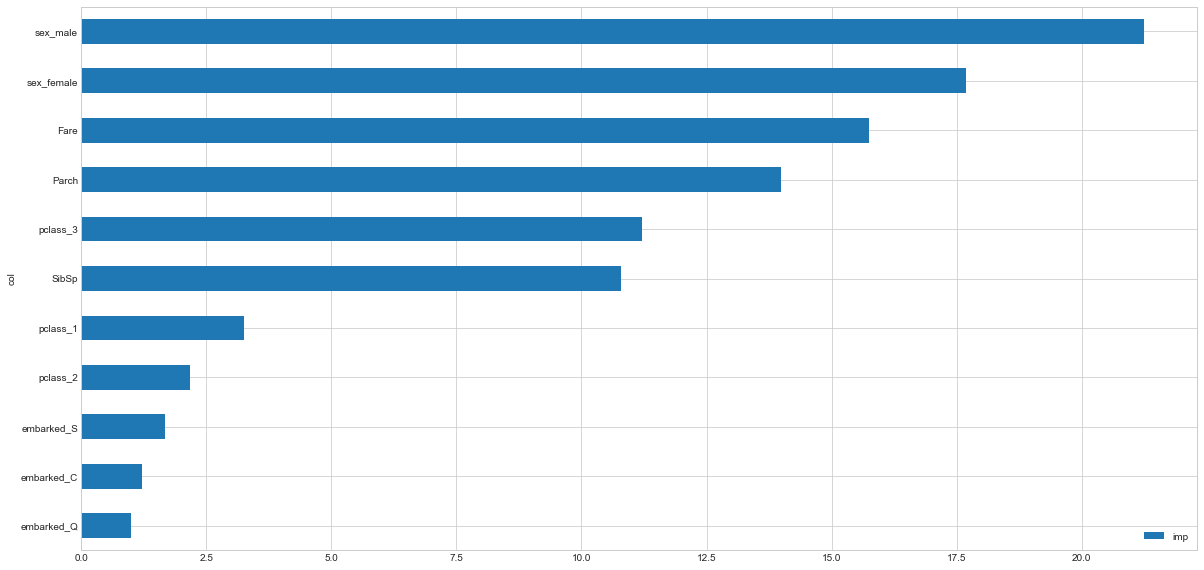

In [91]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

#### Why would you want feature importance?

Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

## Precision and Recall

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

**Recall** = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

**Precision** = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an **F1 score.**

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [92]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


Recall is low, this means there's a higher amount of false negatives (predicting Did not survive when it was actually Survived).

Precision is higher therefore there's less false positives (predicting Survived, when it was actually Did not survive).

**Challenge:** What are some ways to visualise precision and recall? 
*Hint:* You may want to look into what a confusion matrix is, you can find much more information in this blog post: [Beyond Accuracy: Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

## Submission
Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the `test` dateframe, encode them and make a prediciton with our model.

In [93]:
# We need our test dataframe to look like this one
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [94]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [96]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [97]:
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


The columns in `test` have been converted to the same format at `df_con_enc`. Now we can make predictions on the `test` dataframe columns we built a model on.

We can find the columns we made predictions on with `X_train.columns`.

In [98]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [99]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [100]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [101]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [102]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We need our `submission` dataframe to look like the `gender_submisison` dataframe, so we'll turn the `Survived` column into integers.

In [103]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [104]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [105]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [106]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [105]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Now submit your .csv to Kaggle! 

https://www.kaggle.com/c/titanic/submit

## Possible Extensions

These are all possible options to improve this pipeline. I'd suggest starting with the feature engineering (improving and manipulating the existing data) first.

* What can you do with the `Age` feature?
    * How would fill up all the missing values?
    * You may want to look into the `interpolate()` function of Pandas for this
<br>
<br>
2. What can you do with the `Name` feature?
    * What titles did the passengers have? Did this influence their survival?
<br>
<br>
3. What can you do with the `Cabin` feature?
    * Is there a way to see whether they had a cabin or not?
<br>
<br>
4. Can you combine the `SibSp` and `Parch` features to see if the person was alone or not?
<br>
<br>
5. Could you do a PCA/feature analysis to see what features are more important than others?
    * Does removing the less important model features improve the model?
<br>
<br>
7. The models take a bunch of hyperparameters but we've mostly used the default settings, is there a way to find which hyperparameters are best to use?
    * Tip: Check out the `CatBoost` with Python tutorial and the [hyperopt library](https://github.com/hyperopt/hyperopt) to see if you can improve the CatBoost model

    

## References and Learn More

* [Sklearn Classification Notebook by Daniel Furasso](https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb) - Daniel has done some epic work showing how you can take a bigger dataset, clean it up and perform some similar classification work from scratch. It would be a great next step after going through this one.
<br>

* [Encoding categorical features in Python blog post by Practical Python Business](http://pbpython.com/categorical-encoding.html) - this blog post sheds some great light on how to deal with categorical features in Python. The rest of the website contains plenty more great information for using Python in a business environment.
<br>

* [CatBoost Python tutorial on GitHub](https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb) - the tutorial is based on the Titanic Dataset and has some great tricks to improve the results in this notebook.
<br>

* [Shap library](https://github.com/slundberg/shap) - a great (and beautiful) alternative to viewing feature importance. Can you use this to improve on the feature importance graphics?

## Don't forget!
If you complete the challenges or get a better score than the one listed in this notebook, [tweet me](www.twitter.com/mrdbourke) (@mrdbourke) and I'll give your work a shout out.

Keep learning,

Daniel

daniel@mrdbourke.com